# Data Analysis - Celebrity Deaths in 2016

Source: [Wikipedia - Deaths in 2016](https://en.wikipedia.org/wiki/Deaths_in_2016)

#### Structure of dataset:
- File: "celebrity_deaths_2016.xlsx"
- Contains 2 sheets:
 - "celeb_death": contains records of deaths of famous humans and non-humans
 - "cause_of_death": contains the causes of the deaths (you'll need to merge it with the "celeb_death" sheet)

#### Other information about the dataset:
- The cause of death was not reported for all individuals
- The dataset might include deaths that took place in other years (you'll need to ignore these records)
- The dataset might contain duplicate records (you'll need to remove them)

#### The goals of the exercise:
- Load, merge, and clean the data
- Explore the data and answer some simple questions
- Run some basic analysis
- Visualize your results

In [3]:
"""
We're providing most of the import statements you need for the entire exercise
"""

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # disables warning messages

%matplotlib inline

### Load, merge, and clean the data

In [10]:
""" 1.
1. Load the "celebrity_deaths_2016.xlsx" data file in the name "xl". (This file is saved in the same directory as this notebook.)
2. Print the sheet names

Hint:
Look at the xl.sheet_names property
"""

# your code here
# Load the Excel file
xl = pd.ExcelFile('celebrity_deaths_2016.xlsx')

# Print the sheet names
xl.sheet_names


['celeb_death', 'cause_id_all', 'cause_of_death']

In [11]:
""" 2.
1. Read the "celeb_death" sheet into a dataframe named "df"
2. Take a look at the top 5 rows
"""

# your code here
df = pd.read_excel(xl, sheet_name='celeb_death')
df.head()

,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0


In [12]:
""" 3.
1. Take a look at the data types stored in each column in df
2. Get the shape of df
"""

data_types = df.dtypes # your code here
shape = df.shape # Get the shape of df
print(data_types, shape)


date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object (6594, 5)


In [13]:
""" 4.
Drop the duplicates (based on all columns) from df
"""

# your code here
df = df.drop_duplicates()

In [14]:
""" 5.
1. Read the "cause_of_death" sheet into a DataFrame named "cause_of_death"
2. Take a look at the top 5 rows
"""

# your code here
cause_of_death = pd.read_excel('celebrity_deaths_2016.xlsx', sheet_name='cause_of_death')

# Display the top 5 rows of the DataFrame
cause_of_death.head()

,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot


In [15]:
""" 6.
Drop the duplicates (based on the "cause_id" column) from the cause_of_death DataFrame

Hint: There is a single DataFrame method that does this
Use the "subset" argument to specify the "cause_id" column

Reference: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
"""

# your code here
cause_of_death = cause_of_death.drop_duplicates(subset=['cause_id'])

In [16]:
""" 7.
1. Merge the cause_of_death DataFrame with the df DataFrame and name the new DataFrame as "df"
2. Take a look at the top 5 rows in df

Note: There are records in df (left DataFrame) that do not have a matching record in cause_of_death (right DataFrame)
We want to see ALL records in df despite the missing matches in cause_of_death, so you DON'T want to use an "inner join"
"""

# your code here
df = pd.merge(df, cause_of_death, on='cause_id', how='left')
df.head() # Display the top 5 rows of the merged DataFrame


,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure


### Querying data

For the following questions, all the operations are on the Dataframe df.

In [18]:
""" 8.
We'll be doing some calculations with the age column, but it was loaded from the data file as dtype "object"
So first, we need to cast DataFrame df to a numeric value
"""

# your code here
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [19]:
""" 9.
What was the average age of death? Store this value in a variable called 'avg_age', then print it.
"""

# your code here
avg_age = df['age'].mean()
print(avg_age)

77.03194103194103


In [20]:
""" 10.
How many people died after the age of 70?
-- Store the result count in a variable named "count" and print it
"""

# your code here
count = len(df[df['age'] > 70])
print(count)

4752


In [23]:
""" 11.
Who died the youngest and what was the cause of death?
-- Store the name in a variable named "youngest_name" and print it
-- Store the cause in a variable named "youngest_cause" and print it

Hint: Get the min age and find the record that has that value
"""

# your code here
min_age = df['age'].min()
youngest = df[df['age'] == min_age] # Filter the DataFrame for the row with the minimum age

# At least one record that matches, get the name and cause of death
# Possible there could be more than one record with the minimum age
youngest_name = youngest.iloc[0]['name']  # Replace 'name' with the actual column name for the person's name
youngest_cause = youngest.iloc[0]['cause of death']  # Replace 'cause_of_death' with the actual column name for the cause

# Print the name and cause of death of the youngest person
print("Youngest Name:", youngest_name)
print("Cause of Death:", youngest_cause)

Youngest Name: Vautour
Cause of Death:  euthanised


In [24]:
""" 12.
We'll be running some queries based on the "bio" column,
but it was loaded from the data file as an object.  So first, cast this column to a string.
"""

# your code here
df['bio'] = df['bio'].astype(str)

In [25]:
""" 13.
How many American celebrities died?
-- Store the result count in a variable named "count_american" and print it

Hint: Search the bio for "American"
"""

# your code here
# Filter the DataFrame for rows where the "bio" column contains "American"
american_celebrities = df[df['bio'].str.contains("American")]
# Count the number of American celebrities
count_american = len(american_celebrities)
# Print the count
print(count_american)



2136


In [30]:
""" 14.
What was one known cause of death for celebrities who died at age 50?
-- Name the result as "rand_cause"
-- Print the result using "print("Age 50. Cause of Death:", rand_cause)"

Hint:
Get all the celebrity death records for celebrities who died at 50
Ignore the ones where the cause of death is unknown, or NaN
import random and randomly select one of the death records
Extract the cause of death and store in a variable "rand_cause"
"""

#############################################################################################
### DO NOT MODIFY THIS! WE NEED TO SEED THE RANDOM VALUE TO ACCURATELY TEST YOUR SOLUTION ###
import random
random.seed(0)
#############################################################################################

# your code here
# Filter for celebrities who died at age 50 and where cause of death is known (not NaN)
celebs_age_50 = df[(df['age'] == 50) & (df['cause of death'].notna())]

if not celebs_age_50.empty:
    selected_record = celebs_age_50.iloc[random.randint(0, len(celebs_age_50) - 1)]     # Randomly select one record
    rand_cause = selected_record['cause of death']     # Extract the cause of death
else:
    rand_cause = "No known causes of death for celebrities who died at age 50 in this dataset."

print("Age 50. Cause of Death:", rand_cause)


Age 50. Cause of Death:  stabbed


In [33]:
""" 15.
What was the mean age for each cause of death?

Hint: import numpy and group by 'cause of death', then get the mean age and store the
resulting DataFrame in a variable named 'df_grouped_cause', then print it
"""
# your code here
import numpy as np
# Group by 'cause_of_death' and calculate the mean age for each cause
df_grouped_cause = df.groupby('cause of death')['age'].mean().reset_index()

# Print the resulting DataFrame
print(df_grouped_cause)

                                cause of death        age
0                          Alzheimer's disease  79.590909
1                                Myself and I)  76.000000
2                          Parkinson's disease  80.200000
3     Parkinson's disease and multiple myeloma  69.000000
4                               Pick's disease  68.000000
..                                         ...        ...
328                                plane crash  55.500000
329             progressive supranuclear palsy  84.000000
330                                       shot  56.500000
331                                    stabbed  85.000000
332                                      tased  48.000000

[333 rows x 2 columns]


### Count the number of people who died in each month of 2016
1. Create new columns that shows which month and year each person died in
2. Group all the entries based on the month they appeared in

In [35]:
""" 16.
Make a new column in the DataFrame df with the numeric month of death

Hint:
Use the apply() method to run a function against the "date of death" column,
and return the numeric month (get the value by using ".month")
"""

def get_month(date):
    # your code here
    # Return the numeric month from the date
    return date.month if pd.notnull(date) else None

df['date of death'] = pd.to_datetime(df['date of death'], errors='coerce')
df['month of death'] = df['date of death'].apply(get_month)



In [36]:
""" 17.
Make a new column in the DataFrame df with the year of death

Hint: Apply a function to get the year from the "date of death" column
"""

def get_year(date):
    # your code here
    return date.year if pd.notnull(date) else None

df['year of death'] = df['date of death'].apply(get_year)


In [38]:
""" 18.
There could be a small number of deaths that didn't take place in 2016.  Just in case,
filter out the deaths that didn't take place in 2016.
-- Name the new DataFrame as "df_2016"
"""

# your code here
df['date of death'] = pd.to_datetime(df['date of death'], errors='coerce')

# Apply the get_year function to create a new column with the year of death
df['year of death'] = df['date of death'].apply(get_year)

# Filter the DataFrame to include only deaths in 2016
df_2016 = df[df['year of death'] == 2016]


In [39]:
""" 19.
Using a pivot table, obtain a list that contains the number of people that died in each month
-- Use the new DataFrame "df_2016"
-- Name the result as "df_per_month"
"""

# your code here

df_per_month = pd.pivot_table(df_2016, index='month of death', values='name', aggfunc='count').reset_index()
df_per_month.columns = ['Month', 'Deaths']


### Data Visualization

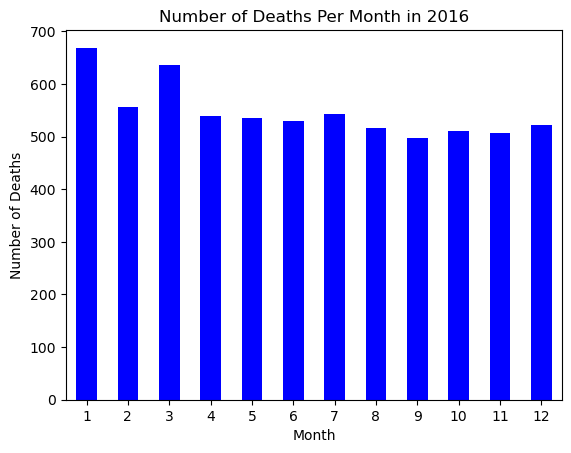

In [40]:
""" 20.
Visualize the number of deaths per month as a bar chart

Hint: A DataFrame has a simple .plot() method you can use.

The x axis should show the individual number of the month and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axes
"""

# your code here
# Plotting the number of deaths per month
df_per_month.plot(kind='bar', x='Month', y='Deaths', color='blue', legend=None)
plt.title('Number of Deaths Per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)



###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

### Make a bar chart that plots the number of deaths per nationality
1. Create a new column that identifies the nationality of each celebrity, extracting the first word from the bio
2. Make a bar chart that plots the number of deaths per nationality

In [ ]:
""" 21.
Create a new column in the DataFrame df that identifies the nationality of each celebrity,
extracting the first word from the bio

Hint:
To get the nationality from the bio, use the method split() on the column "bio"
and use the first element in the split result as the nationality.

For simplicity purposes, don't worry about nationalities containing more than 1 word.  For example,
when getting the nationality from "bio", it's OK to get "New" for New Zealand or "Costa" for Costa Rican.
"""

def get_nationality(bio):
    # your code here


In [ ]:
""" 22.
Make a bar chart that plots the number of deaths per nationality
Only include nationalities with more than 50 deaths
-- Name the resulting Series as "unlucky_countries"
Hint(s):
Get the count of unique values in the 'nationality' column using the value_counts() method.
Filter the resulting Series to only include those nationalities with a count of more than 50.
Plot the final Series.  Note, a Series has a simple .plot() method you can use.
The x axis should show the individual nationalities and the y axis should show the death counts
Don't forget to add a title and labels for the x and y axis
"""

# your code here




###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################